## 정리하는 두가지 방법

- **산점도**
    - 두 숫자형 변수의 관계를 나타내는 그래프
    - 숫자 vs 숫자를 비교할 때 중요한 관점 : `**직선**`   
- **수치화** : 공분산, 상관계수
    - **상관계수**
        - 관계를 수치화
        - -1 ~ 1 사이의 값을 가진다.
        - 상관계수끼리 비교 가능한다.
        - -1 또는 1에 가까울 수록 강한 상관관계를 나타낸다.
    - **상관분석**
        - 상관계수가 유의미한 지를 검정(test) ⇒ 상관분석
        
        ```python
        # 피어슨 상관분석 함수
        # NaN이 있으면 계산괴지 않는다.
        # 그래서 NaN를 빼고 (.notnull()) 계산해야 한다.
        
        import scipy.stats as spst
        
        spst.pearsonr(air['Temp'], ari['Ozeon']) # 결과 : (상관계수, p-value)
        
        ```
        
    
    `**데이터프레임.corr()**` 함수를 사용하여 모든 숫자형 변수들간 상관계수를 계산할 수 있다.
    
    ```python
    df.corr()
    ```
    

### 요약 : 숫자 vs 숫자

**Focus** : 직선

- 얼마나 직선으로 잘 설명할 수 있는가 ?
- 얼마나 직선에 점들이 모여 있는가 ?

**시각화** : 산점도

- 두 숫자형 변수의 관계를 눈으로 확인
- 직선의 관계를 확인하지만, 직선이 아닌 관계(패턴)도 확인

**수치화** : 상관분석

- 상관계수
    - 값의 범위 : -1 ~ +1
    - -1 혹은 +1에 가까울수록 강한 상관관계
    - 0에 가까울수록 약한 상관관계
- p-value : 0.05보다 작으면 상관관계가 있다고 판단

# 0. 환경 준비

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
display(titanic.head())

# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
display(air.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


# 1. 시각화 : 산점도

* 문법
    * plt.scatter( x축 값, y축 값 )
    * plt.scatter( ‘x변수’, ‘y변수’, data = dataframe이름) 
    
- 두 변수의 관계
    - 산점도에서 또렷한 패턴이 보인다면, 강한 관계로 볼 수 있다.
    - 특히, 직선의 패턴이 보인다면

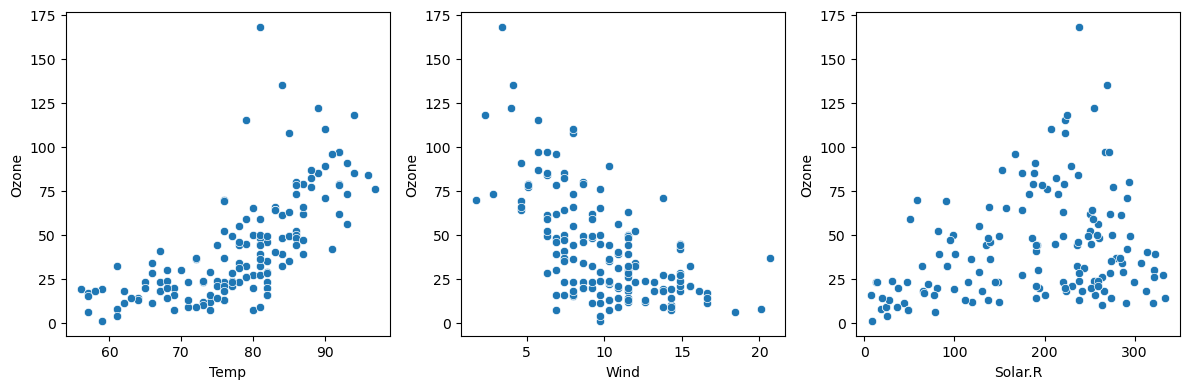

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x='Temp', y='Ozone', data= air)


plt.subplot(1,3,2)
sns.scatterplot(x='Wind', y='Ozone', data= air)


plt.subplot(1,3,3)
sns.scatterplot(x='Solar.R', y='Ozone', data= air)

plt.tight_layout()
plt.show()

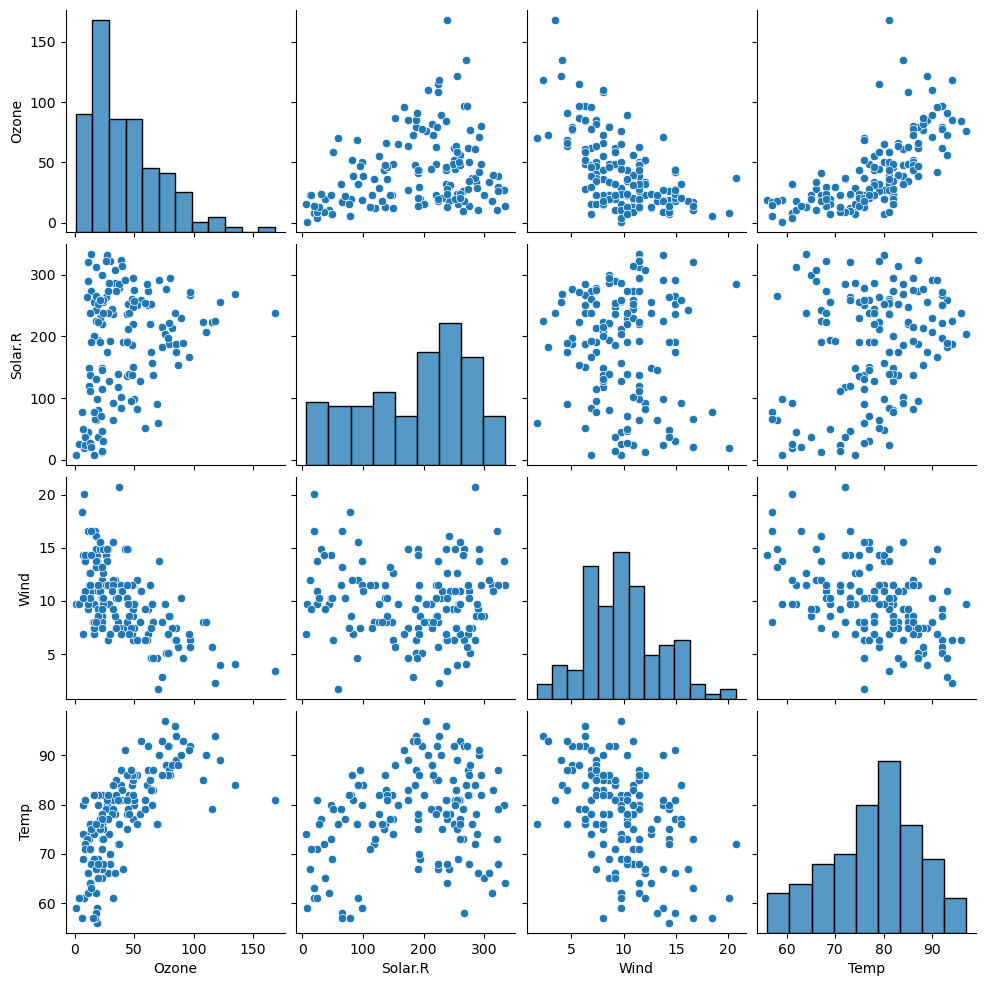

In [7]:
# pairplot 한꺼번에 시각화 (다만 시간이 많이 걸린다)
sns.pairplot(air)
plt.show()

# 3. 수치화 : 상관 분석

* 상관계수 𝑟
    * 공분산을 표준화 한 값
    * -1 ~ 1 사이의 값
    * -1, 1에 가까울 수록 강한 상관관계를 나타냄.

In [11]:
# 상관계수와 p-value 
spst.pearsonr(air['Temp'], air['Ozone'])

PearsonRResult(statistic=0.6833717861490114, pvalue=2.197769800200284e-22)

↑ 위 결과의 경우

1. 튜플의 첫 번째 값 : 상관계수를 뜻합니다.
2. 두번째 값 : p-value
    * 귀무가설 : 상관 관계가 없다.(상관계수가 0이다.)
    * 대립가설 : 상관 관계가 있다.(상관계수가 0이 아니다.)
3. 주의 사항 : 값에 NaN이 있으면 계산되지 않습니다. 반드시 .notnull()로 제외하고 수행해야 합니다.

데이터프레임 한꺼번에 상관계수를 구한다면 아래와 같은 함수 사용한다.
```
데이터프레임.corr()
```

In [12]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
air.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_1764\1676378197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  air.corr()


,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.280068,-0.605478,0.683372
Solar.R,0.280068,1.000000,-0.056792,0.275840
Wind,-0.605478,-0.056792,1.000000,-0.457988
Temp,0.683372,0.275840,-0.457988,1.000000


↑ 위 결과의 경우

1. 같은 변수끼리 구한 값 1은 의미 없다.
2. 상관계수의 절대값이
    1에 가까울 수록 강한 상관관계
    0에 가까울 수록 약한 상관관계
3. +는 양의 상관관계, -는 음의 상관관계

### 추가) heatmap으로 시각화 하기

C:\Users\user\AppData\Local\Temp\ipykernel_1764\597608571.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(air.corr(),


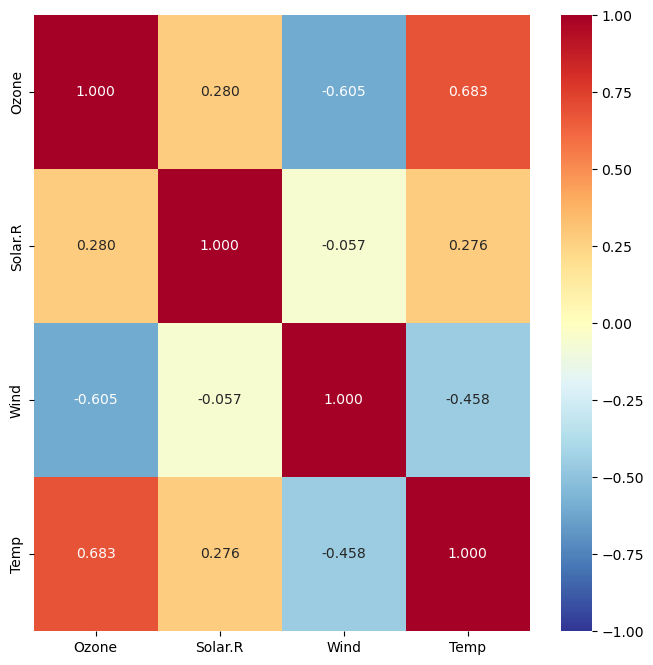

In [13]:
plt.figure(figsize = (8, 8))
sns.heatmap(air.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()